In [2]:
from keras.datasets import fashion_mnist
import numpy as np
import keras
import matplotlib.pyplot as plt

In [3]:
(train_imagef, train_labelf),(test_imagef, test_labelf)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


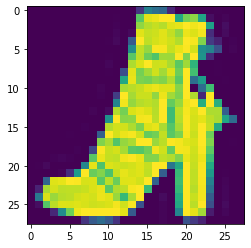

In [ ]:
plt.imshow(train_imagef[11, :, :])
plt.show()

In [4]:
# Normalize the images.
train_imagef = (train_imagef / 127) -1
test_imagef = (test_imagef / 127) -1

# Flatten the images
train_images = train_imagef.reshape((-1, 784))
test_images = test_imagef.reshape((-1, 784))

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [27]:
labels = np.unique(train_labelf)

In [5]:
from keras.models import Sequential
from keras.layers import  Dense
from tensorflow.keras.utils import to_categorical

In [6]:
# Build the model.

model = Sequential([
                    Dense(128, activation='tanh', input_shape=(784,)),
                    Dense(110, activation='tanh'),
                    Dense(100, activation='tanh'),
                    Dense(10, activation='softmax'),
])

In [7]:
# Compile the model.

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 110)               14190     
                                                                 
 dense_2 (Dense)             (None, 100)               11100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


In [9]:
y_train = to_categorical(train_labelf)
y_test = to_categorical(test_labelf)

In [10]:
# Train the model

model.fit(
    train_images[:,:],
    y_train[:,:],
    epochs=15,
    batch_size=32, validation_split=0.2
)

Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5059 - accuracy: 0.8164 - val_loss: 0.4368 - val_accuracy: 0.8422
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4012 - accuracy: 0.8537 - val_loss: 0.3930 - val_accuracy: 0.8571
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3738 - accuracy: 0.8627 - val_loss: 0.3979 - val_accuracy: 0.8553
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3552 - accuracy: 0.8692 - val_loss: 0.3773 - val_accuracy: 0.8653
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3395 - accuracy: 0.8748 - val_loss: 0.3717 - val_accuracy: 0.8640
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3286 - accuracy: 0.8811 - val_loss: 0.3640 - val_accuracy: 0.8698
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3185 - accuracy: 0.8831 - val_loss: 0.3564 - val_accuracy:

In [11]:
# Evaluate the model.
test_loss_1_1, test_accuracy_1_1 = model.evaluate(
    test_images,
    y_test
)
# test_loss , test_accuracy
print(test_accuracy_1_1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3736 - accuracy: 0.8653
0.8652999997138977


In [ ]:
model.save_weights('model.h5')

### Вывод: Для двухслойной сети точность составила 0.8689

In [ ]:
layer_numbers = [2, 3, 5, 10]
accuracy_layers = []
for layer_number in layer_numbers:
  model_2 = Sequential()
  # входной слой + поносвязный слой из 128 нейронов с активацией ReLU
  model_2.add(Dense( 128, activation='relu', input_shape=(784,)))  
  
  for k in range(layer_number):
    # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh
    model_2.add(Dense(  10+(10-k)*10, activation='tanh')) 
  
  model_2.add(Dense(10, activation='softmax')) 

  model_2.compile(
  optimizer='adam', # оптимизатор
  loss=keras.losses.CategoricalCrossentropy(), # функция потерь
  metrics=['accuracy'], # метрика
    ) 
  
  # Train the model
  model_2.fit(
    train_images[:,:],
    y_train[:,:],
    epochs=15,
    batch_size=32, validation_split=0.2
    )
  
  # Evaluate the model.
  test_loss_1_2, test_accuracy_1_2 = model_2.evaluate(
    test_images,
    y_test
    )
  # test_loss , test_accuracy
  print(test_accuracy_1_2)
  accuracy_layers.append(test_accuracy_1_2)
  

Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5015 - accuracy: 0.8171 - val_loss: 0.4345 - val_accuracy: 0.8443
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3859 - accuracy: 0.8582 - val_loss: 0.3807 - val_accuracy: 0.8593
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3469 - accuracy: 0.8724 - val_loss: 0.3618 - val_accuracy: 0.8680
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3245 - accuracy: 0.8799 - val_loss: 0.3645 - val_accuracy: 0.8685
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3046 - accuracy: 0.8870 - val_loss: 0.3520 - val_accuracy: 0.8724
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2925 - accuracy: 0.8912 - val_loss: 0.3236 - val_accuracy: 0.8813
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2779 - accuracy: 0.8972 - val_loss: 0.3447 - val_accuracy:

In [26]:
import pandas as pd
layers_accurasys_data = {'Layers': layer_numbers, 'Accuracys': accuracy_layers}
# Create DataFrame.
layers_accurasys_df = pd.DataFrame(layers_accurasys_data)
# Print the output.
print(layers_accurasys_df)

NameError: ignored

### Вывод: С увеличением количества слоев, точность модели уменьшается.

2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [ ]:
train_accurasys_optim =[]
test_accurasys_optim = []
# Build the model.

model_3= Sequential([
                    Dense(128, activation='tanh', input_shape=(784,)),
                    Dense(110, activation='tanh'),
                    Dense(100, activation='tanh'),
                    Dense(10, activation='softmax'),
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model_3.save_weights('model_3.h5')

# число рабочих эпох
epochs = 15
optimizers_list = ['SGD','RMSProp','adam','NAdam']
#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
for i_optim in optimizers_list:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                       Dense(128, activation='tanh', input_shape=(784,)),
                       Dense(110, activation='tanh'),
                       Dense(100, activation='tanh'),
                       Dense(10, activation='softmax'),
                       ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model_3.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
 
  # проводим обучение модели 
  modeli.fit(
      train_images[:,:],
      y_train[:,:],
      epochs=15,
      batch_size=32, validation_split=0.2
      )
  
  # Evaluate the model.
  train_loss_3, train_accuracy_3 = modeli.evaluate(
      train_images,
      y_train
      )
  test_loss_3, test_accuracy_3 = modeli.evaluate(
      test_images,
      y_test
      )
  train_accurasys_optim.append(train_accuracy_3)
  test_accurasys_optim.append(test_accuracy_3)
  


Epoch 1/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6363 - accuracy: 0.7823 - val_loss: 0.4769 - val_accuracy: 0.8267
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4447 - accuracy: 0.8415 - val_loss: 0.4298 - val_accuracy: 0.8429
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4017 - accuracy: 0.8562 - val_loss: 0.3983 - val_accuracy: 0.8552
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3755 - accuracy: 0.8655 - val_loss: 0.3869 - val_accuracy: 0.8581
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3568 - accuracy: 0.8704 - val_loss: 0.3831 - val_accuracy: 0.8587
Epoch 6/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3411 - accuracy: 0.8764 - val_loss: 0.3665 - val_accuracy: 0.8650
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3274 - accuracy: 0.8816 - val_loss: 0.3470 - val_accuracy:

In [ ]:
optim_accurasys_data = {'Optimizators': optimizers_list, 'Accuracys_train': train_accurasys_optim, 'Accuracys_test': test_accurasys_optim}
# Create DataFrame.
optim_accurasys_df = pd.DataFrame(optim_accurasys_data)
# Print the output.
print(optim_accurasys_df)

  Optimizators  Accuracys_train  Accuracys_test
0          SGD         0.901750          0.8689
1      RMSProp         0.912733          0.8719
2         adam         0.899800          0.8661
3        NAdam         0.898267          0.8635


### Вывод: Применение оптимизатора RMSProp позволило увеличить точность модели.

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
y_pred = np.argmax(model.predict(test_images), axis=1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [14]:
CM = confusion_matrix(test_labelf,y_pred)
print(CM)

[[817   3  13  48   3   2 101   0  13   0]
 [  0 970   0  22   6   0   2   0   0   0]
 [ 15   0 747  18 138   0  79   0   3   0]
 [ 14  18  13 867  62   0  20   0   6   0]
 [  0   1  75  26 863   0  32   0   3   0]
 [  0   0   0   1   0 952   1  30   1  15]
 [119   2  85  43 131   0 602   0  18   0]
 [  0   0   0   0   0  37   0 920   0  43]
 [  1   0   3   9   4   4   8   4 967   0]
 [  1   0   0   0   0  20   0  31   0 948]]


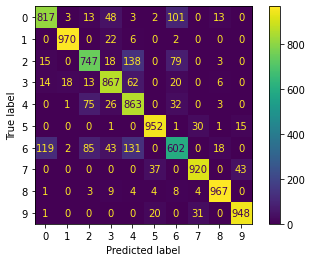

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=np.arange(10))

disp.plot( values_format ='.3g')
plt.show()

In [16]:
from sklearn.metrics import  precision_score, recall_score


In [20]:
print(precision_score(test_labelf, y_pred, average="macro"))
print(recall_score(test_labelf, y_pred, average="macro")) 

0.8655492163438941
0.8652999999999998


In [25]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(test_labelf, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))


precision: [0.84488108 0.97585513 0.79807692 0.8384913  0.71499586 0.93793103
 0.71242604 0.93401015 0.95647873 0.94234592]
recall: [0.817 0.97  0.747 0.867 0.863 0.952 0.602 0.92  0.967 0.948]


In [28]:
import pandas as pd
prec_recall_data = {'Labels': labels, 'Precisions': precision, 'Recall': recall}
# Create DataFrame.
prec_recall_df = pd.DataFrame(prec_recall_data)
# Print the output.
print(prec_recall_df)

   Labels  Precisions  Recall
0       0    0.844881   0.817
1       1    0.975855   0.970
2       2    0.798077   0.747
3       3    0.838491   0.867
4       4    0.714996   0.863
5       5    0.937931   0.952
6       6    0.712426   0.602
7       7    0.934010   0.920
8       8    0.956479   0.967
9       9    0.942346   0.948


### Вывод: из таблицы точности и полноты наилучшие результаты у класса "1", наихудшие у класса "6"